In [32]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [38]:
text = """Elon Reeve Musk FRS (/ˈiːlɒn/ EE-lon; born June 28, 1971) is a business magnate and investor. He is the founder, CEO and chief engineer of SpaceX; angel investor, CEO and product architect of Tesla, Inc.; owner and CEO of Twitter; founder of the Boring Company; co-founder of Neuralink and OpenAI; and president of the philanthropic Musk Foundation. With an estimated net worth of around $192 billion as of March 27, 2023, primarily from his ownership stakes in Tesla and SpaceX,[4][5] Musk is the second-wealthiest person in the world, according to both the Bloomberg Billionaires Index and Forbes's real-time billionaires list.[6][7]

Musk was born in Pretoria, South Africa, and briefly attended at the University of Pretoria before moving to Canada at age 18, acquiring citizenship through his Canadian-born mother. Two years later, he matriculated at Queen's University and transferred to the University of Pennsylvania, where he received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University. After two days, he dropped out and, with his brother Kimbal, co-founded the online city guide software company Zip2. In 1999, Zip2 was acquired by Compaq for $307 million and Musk co-founded X.com, a direct bank. X.com merged with Confinity in 2000 to form PayPal, which eBay acquired for $1.5 billion in 2002.

With $175.8 million, Musk founded SpaceX in 2002, a spaceflight services company. In 2004, he was an early investor in the electric vehicle manufacturer Tesla Motors, Inc. (now Tesla, Inc.). He became its chairman and product architect, assuming the position of CEO in 2008. In 2006, he helped create SolarCity, a solar energy company that was later acquired by Tesla and became Tesla Energy. In 2015, he co-founded OpenAI, a nonprofit artificial intelligence research company. The following year, he co-founded Neuralink—a neurotechnology company developing brain–computer interfaces—and the Boring Company, a tunnel construction company. Musk has also proposed a hyperloop high-speed vactrain transportation system. In 2022, his acquisition of Twitter for $44 billion was completed.

Musk has made controversial statements on politics and technology, particularly on Twitter, and is a polarizing figure. He has been criticized for making unscientific and misleading statements, including spreading COVID-19 misinformation. In 2018, the U.S. Securities and Exchange Commission (SEC) sued Musk for falsely tweeting that he had secured funding for a private takeover of Tesla. Musk stepped down as chairman of Tesla and paid a $20 million fine as part of a settlement agreement with the SEC."""

In [5]:
doc = nlp(text)

In [6]:
def freq(text):
    l = process(text).split(" ")
    a=[]
    for i in l:
        if i not in a:
            a.append(i)
    words={i:l.count(i)for i in a}
    return words
        

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

In [8]:
def process(text):
    doc = nlp(text)
    
    processed_txt=[token.text for token in doc if not token.is_stop and not token.is_punct] 
    return " ".join(processed_txt)
    

In [44]:
def most_imp_words(text):
    sorted_dict = dict(sorted(freq(text).items(), key=lambda x:x[1],reverse=True))
    x=dict(list(sorted_dict.items())[0:30])
    return x

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
def word_cloud_generator(text):
    doc = nlp(text)
    
    processed_txt=[token.text for token in doc if not token.is_stop and not token.is_punct] 
    processed_text= " ".join(processed_txt)
    
    l = processed_text.split(" ")
    a=[]
    for i in l:
        if i not in a:
            a.append(i)
    words={i:l.count(i)for i in a}
    
    sorted_dict = dict(sorted(words.items(), key=lambda x:x[1],reverse=True))
    x=dict(list(sorted_dict.items())[0:30])
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(x)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

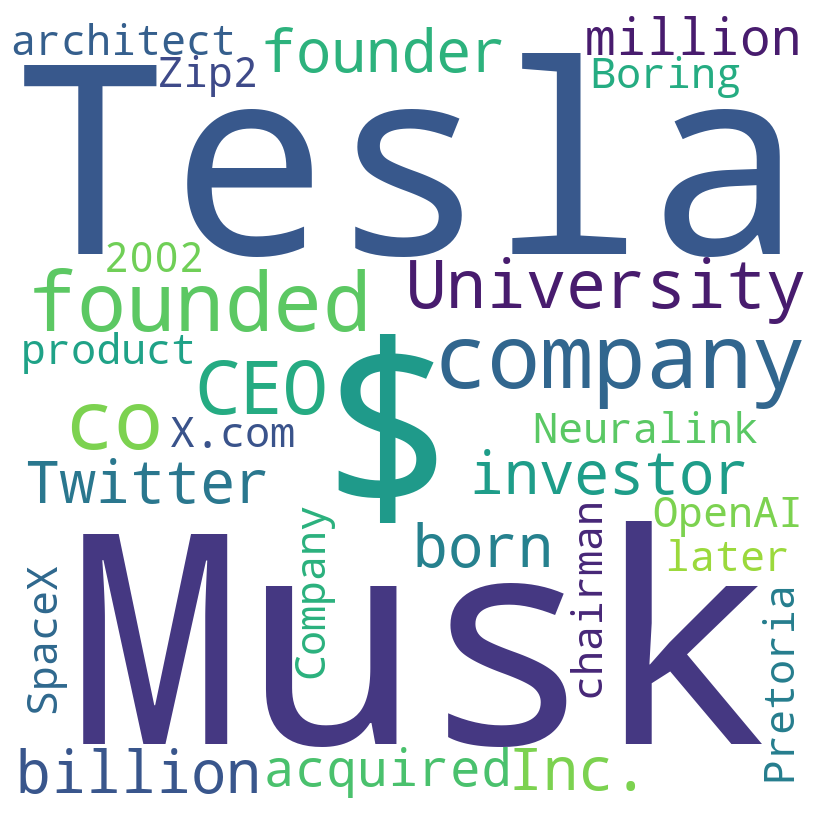

In [42]:
word_cloud_generator(text)